今天给大家介绍一个非常好用的Python数据可视化包：PyComplexHeatmap，对于用Python做机器学习、统计、科学研究和数据分析的朋友来说，这是一个非常有帮助的可视化工具：

## 1. 安装

```shell
pip install PyComplexHeatmap
```
或者
```shel
pip install git+https://github.com/DingWB/PyComplexHeatmap
```

Github项目链接： https://github.com/DingWB/PyComplexHeatmap

## 2. 各种各样的行/列注释

In [10]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['font.family']='sans serif' #please remove this line if font is not installed
plt.rcParams['font.sans-serif']='Arial' # please remove this line if Arial font is not installed
plt.rcParams['pdf.fonttype']=42
from PyComplexHeatmap import *

In [3]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df.head()

,AB,CD,EF,F
sample1,GroupA,C,E,0.417550
sample2,GroupA,C,E,0.052523
sample3,GroupA,C,E,1.253483
sample4,GroupA,D,E,-0.407985
sample5,GroupA,D,E,-0.882742


给一个上述Python dataframe，就可以直接画出热图的注视，比如：

Starting plotting HeatmapAnnotations


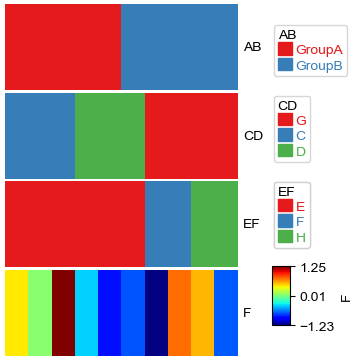

In [4]:
plt.figure(figsize=(3, 4))
col_ha = pch.HeatmapAnnotation(
    df=df,plot=True,legend=True,legend_gap=5,hgap=0.5,axis=1
)
plt.show()

再举一个稍微复杂一点的例子：

In [13]:
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar1 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T1-A', 'T1-B'])
df_bar1.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar2 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T2-A', 'T2-B'])
df_bar2.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T3-A', 'T3-B'])
df_bar3.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3.iloc[5,0]=np.nan
df_bar4 = pd.DataFrame(np.random.uniform(0, 10, (10, 1)), columns=['T4'])
df_bar4.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4.iloc[7,0]=np.nan

Starting plotting HeatmapAnnotations


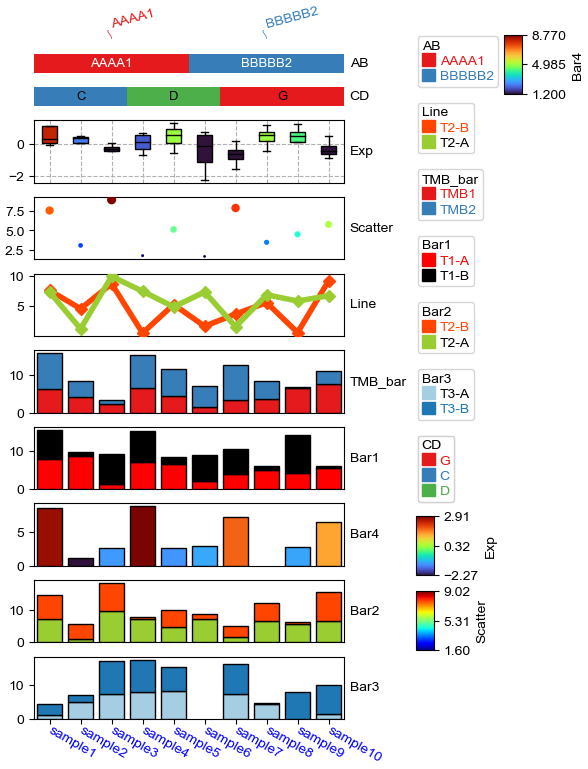

In [14]:
plt.figure(figsize=(4, 8))
col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True), axis=1,
            CD=anno_simple(df.CD, add_text=True,text_kws={'color':'black'}),
            Exp=anno_boxplot(df_box, cmap='turbo',grid=True),
            Scatter=anno_scatterplot(df_scatter,legend=True),
            Line=anno_lineplot(df_bar2,linewidth=4,colors={'T2-B':'orangered','T2-A':'yellowgreen'},
                              marker='D',legend=True),  #colors=['orangered','yellowgreen']
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            Bar1=anno_barplot(df_bar1,legend=True,colors=['red','black']), #colors can be str, list, tuple or dict
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Bar2=anno_barplot(df_bar2,legend=True,colors={'T2-B':'orangered','T2-A':'yellowgreen'}),
            Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
            plot=True,legend=True,legend_gap=5,hgap=4)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=-30)
plt.show()

除了boxplot,barplot, scatter plot和sinmple annotation， 还有图片注释和标签注释，比如：

<img src="https://dingwb.github.io/PyComplexHeatmap/build/html/_images/notebooks_dev_26_1.png" width="600"/>
<img src="https://dingwb.github.io/PyComplexHeatmap/build/html/_images/notebooks_single_cell_methylation_8_1.png" width="600"/>

## 3. 单独画热图

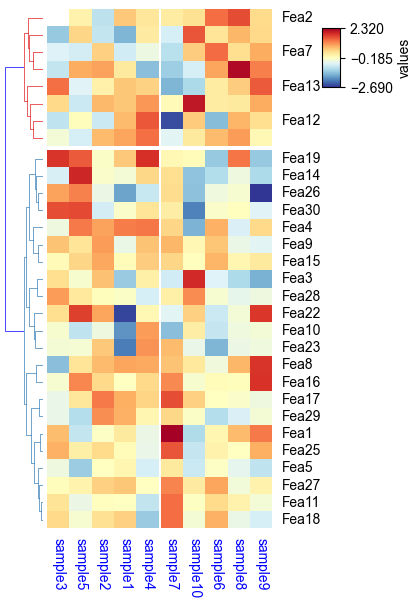

In [5]:
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

plt.figure(figsize=(3.5, 6))
cm = pch.ClusterMapPlotter(
    data=df_heatmap,
    col_cluster=True,row_cluster=True,
    col_split=df.AB,row_split=2, 
    col_split_gap=0.5,row_split_gap=0.8,
    label='values',row_dendrogram=True,
    show_rownames=True,show_colnames=True,
    row_names_side='right',
    tree_kws={'row_cmap': 'Set1','colors':'blue'},verbose=0,legend_gap=5,
    cmap='RdYlBu_r',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
plt.savefig("example0.pdf", bbox_inches='tight')
plt.show()

## 4. 热图与行/列注释一起画

Starting plotting HeatmapAnnotations


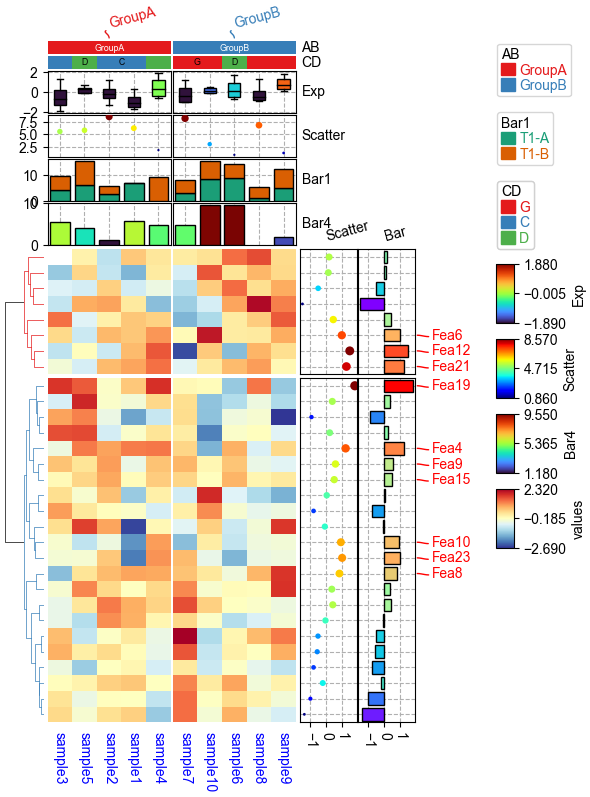

In [6]:
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

col_ha = pch.HeatmapAnnotation(
    label=pch.anno_label(df.AB, merge=True,rotation=15),
    AB=pch.anno_simple(df.AB,add_text=True,legend=True), axis=1,
    CD=pch.anno_simple(df.CD, add_text=True,legend=True,
                       text_kws={'color':'black'}),
    Exp=pch.anno_boxplot(df_box, cmap='turbo',legend=True),
    Scatter=pch.anno_scatterplot(df_scatter), 
    Bar1=pch.anno_barplot(df_bar1,legend=True,cmap='Dark2'),
    Bar4=pch.anno_barplot(df_bar4,legend=True,cmap='turbo'),
    legend=True,legend_gap=5,hgap=0.5)

row_ha = pch.HeatmapAnnotation(
    Scatter=pch.anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                    height=15,cmap='jet',legend=False),
    Bar=pch.anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                    height=15,cmap='rainbow',legend=False),
    selected=pch.anno_label(df_rows,colors='red',relpos=(-0.05,0.4)),
    label_kws={'rotation':15,'horizontalalignment':'left','verticalalignment':'bottom'},
    axis=0,verbose=0)

plt.figure(figsize=(5.5, 8))
cm = pch.ClusterMapPlotter(
    data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
    col_cluster=True,row_cluster=True,
    col_split=df.AB,row_split=2, 
    col_split_gap=0.5,row_split_gap=0.8,
    label='values',row_dendrogram=True,
    show_rownames=False,show_colnames=True,
    tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
    cmap='RdYlBu_r',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
plt.savefig("example0.pdf", bbox_inches='tight')
plt.show()

热图中几乎所有的元素都可以通过代码和参数来控制，比如，如下图所示，可以控制各种距离：

<img src="https://raw.githubusercontent.com/DingWB/PyComplexHeatmap/main/docs/images/gallery1.png" width="600"/>

来自官网[https://dingwb.github.io/PyComplexHeatmap](https://dingwb.github.io/PyComplexHeatmap)的更多好看的热图示例：

<img src="https://dingwb.github.io/PyComplexHeatmap/build/html/_images/notebooks_cpg_modules_15_0.png" width="400"/>
<img src="https://dingwb.github.io/PyComplexHeatmap/build/html/_images/notebooks_advanced_usage_23_0.png" width="400"/>
<img src="https://dingwb.github.io/PyComplexHeatmap/build/html/_images/notebooks_advanced_usage_25_0.png" width="400"/>

## 5. 点状热图：

点状热图(dotHeatmap)可以用来展示多大5个维度的数据：行、列、点的颜色、点的大小、点的形状。如下图所示：

<img src="https://dingwb.github.io/PyComplexHeatmap/build/html/_images/notebooks_gene_enrichment_analysis_16_1.png" width="600"/>

更多关于PyComplexHeatmap的教程和示例代码，请访问：[https://github.com/DingWB/PyComplexHeatmap](https://github.com/DingWB/PyComplexHeatmap) 和 [https://dingwb.github.io/PyComplexHeatmap](https://dingwb.github.io/PyComplexHeatmap)